In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
import numpy as np
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
with open('../data/pickles/df_salesBasic.pkl', "rb") as file:
    df_salesBasic = pickle.load(file)

In [3]:
df_news = pd.read_csv('../data/wiggle.news.csv')

In [4]:
df_news = df_news.drop(columns=['_id','news_brand'])

In [5]:
# 결측치 처리
while True:
    nan_list = df_news.query('news_date.isna()').index

    for i in nan_list:
        try:
            df_news['news_date'].iloc[i] = df_news['news_date'].iloc[i+1]
        except:
            pass

    if len(nan_list) == 0:
        break

In [6]:
# 날짜 형식 변경
def to_datetime(get_list):
    change_list = list()
    for i in get_list:
        date = ''
        try:
            temp_list = i.split('. ')
            date += temp_list[0]
            date += '-'

            if len(temp_list[1]) == 1:
                date += '0'
                date += temp_list[1]
            else:
                date += temp_list[1]

            change_list.append(date)
        except:
            change_list.append(np.nan)

    return change_list

In [7]:
df_news['news_date'] = to_datetime(df_news['news_date'])

## 뉴스 전처리

In [8]:
# 영어, 한글만 선택
import re

def replace_text(text):
    text = text.replace('\\n',' ')
    text = re.sub(r'[^a-zA-Z가-힣\s]',' ',text)
    return text

In [9]:
df_news['newText'] = df_news['news_title'] + ' ' + df_news['news_contents']
df_news['newText'] = df_news['newText'].apply(replace_text)

### 체크 날짜 선정
- 2022-08 / 2022-12 / 2023-02 / 2023-07 / 2023-09 / 2023-12 / 2024-02

In [10]:
check_date = ['2022-08','2022-12','2023-02','2023-07','2023-09','2023-12','2024-02']

In [11]:
df_news

,news_title,news_date,news_contents,newText
0,[HOTEL] 샴페인이 그리운 가을,2021-09,"©그랜드 조선 부산\n샴페인이 그리운 가을, 그랜드 조선 부산\n그랜드 조선 부산이...",HOTEL 샴페인이 그리운 가을 그랜드 조선 부산 샴페인이 그리운 가을 그랜...
1,"헤어브러쉬 탱글티저·핸드크림 카밀, 올영세일로 만난다",2021-09,"기사내용 요약\n탱글티저와 카밀 각각 최대 40%, 37% 할인\n[서울=뉴시스] ...",헤어브러쉬 탱글티저 핸드크림 카밀 올영세일로 만난다 기사내용 요약 탱글티저와 카밀...
2,[위클리 스마트] 디자인 승부수 띄운 갤플립3..액세서리 인기 '불티',2021-09,"""액세서리로 개성 표현하려는 MZ세대에 선택권 제공하려 제휴"" (서울=연합뉴스) 정...",위클리 스마트 디자인 승부수 띄운 갤플립 액세서리 인기 불티 액세서리로...
3,갤플립3 '꾸미기 열풍'..액세서리 불티나,2021-09,[한국경제TV 장진아 기자]\n삼성전자의 새로운 폴더블폰 갤럭시Z플립3의 '꾸미기 ...,갤플립 꾸미기 열풍 액세서리 불티나 한국경제TV 장진아 기자 삼성전자의 ...
4,'꾸미는 재미' 액세서리로 왜 접어야 하는지 보여준 갤Z플립3,2021-09,[경향신문]\n삼성전자가 갤럭시Z플립3용으로 내놓은 액세서리 링(왼쪽 라벤더와 올리...,꾸미는 재미 액세서리로 왜 접어야 하는지 보여준 갤Z플립 경향신문 삼성전자...
...,...,...,...,...
775,"SK매직, '위글위글'과 협업···정수기 2종 출시",2024-04,톡톡 튀는 '위글위글' 디자인 적용... 개성 넘치는 주방 연출\n계약 고객 대상 ...,SK매직 위글위글 과 협업 정수기 종 출시 톡톡 튀는 위글위글 디자인 ...
776,"SK매직, 위글위글과 콜라보 정수기 2종 출시",2024-04,초소형 직수 정수기·미니 정수기 선봬 (지디넷코리아=신영빈 기자)SK매직이 라이프스...,SK매직 위글위글과 콜라보 정수기 종 출시 초소형 직수 정수기 미니 정수기 선봬...
777,"색다른 정수기 원한다면?…SK매직, 위글위글 콜라보 상품 2종 출시",2024-04,/사진제공=SK매직.\n\nSK매직이 라이프스타일 브랜드 위글위글과 콜라보해 △초소...,색다른 정수기 원한다면 SK매직 위글위글 콜라보 상품 종 출시 사진제공 SK...
778,"SK매직, 'MZ세대 인기' 위글위글과 콜라보…정수기 출시",2024-04,"초소형 직수 정수기, 미니 정수기 2종 출시\n콜라보 정수기 출시 기념해 이벤트도 ...",SK매직 MZ세대 인기 위글위글과 콜라보 정수기 출시 초소형 직수 정수기 미...


In [12]:
df_check = pd.DataFrame()

for i in check_date:
    df_check = pd.concat([df_check,df_news.query(f'news_date == "{i}"')])

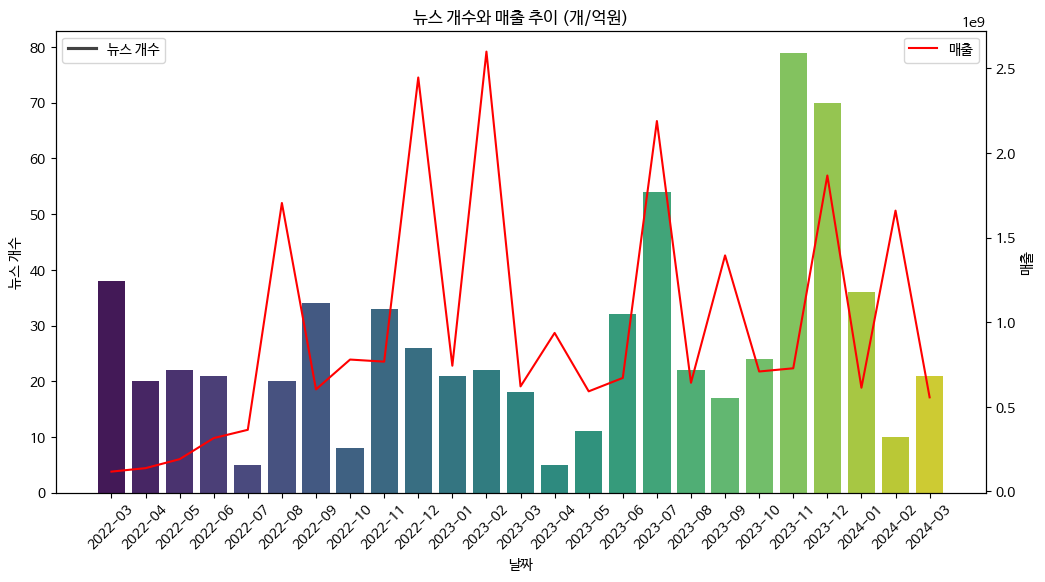

In [24]:
plt.figure(figsize=(12, 6))

# 뉴스 개수를 시간에 따라 추이를 보여주는 바플롯
news_counts = df_news.query('news_date >= "2022-03" & news_date <= "2024-03"').groupby('news_date').size()
sns.barplot(x=news_counts.index, y=news_counts, palette='viridis')

plt.title('뉴스 개수와 매출 추이 (개/억원)')
plt.xlabel('날짜')
plt.ylabel('뉴스 개수')
plt.xticks(rotation=45)
plt.legend(['뉴스 개수'], loc='upper left')

# 두 번째 축 설정
ax2 = plt.gca().twinx()
ax2.set_ylabel('매출')

# 매출 데이터를 시간에 따라 추이를 보여주는 라인 플롯
sales_data = df_salesBasic.query('referenceMonth >= "2022-03" & referenceMonth <= "2024-03"')
sns.lineplot(data=sales_data, x='referenceMonth', y='inCome', color='red', ax=ax2)

plt.legend(['매출'], loc='upper right')
plt.show()

## 체크 날짜 LDA

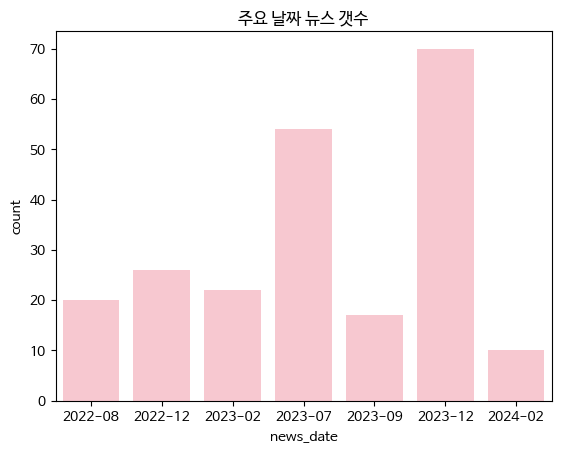

In [25]:
sns.countplot(data=df_check, x='news_date', color='pink')

plt.title('주요 날짜 뉴스 갯수')
plt.show()

### 토큰 / 벡터라이징

In [15]:
from konlpy.tag import Okt
stopword = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','의','가','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [16]:
# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

import re
import numpy as np


# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopword):

  get_list = []

  for word, tag in okt.pos(raw,norm=True,stem=True):
    if len(word) <= 1:
      word = '공란'

    if tag in pos and word not in stopword:
      get_list.append(word)
    else:
      get_list.append('공란')
    pass


  return get_list

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)

### 군집 최적화
- CoherenceModel 사용

In [18]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [19]:
def Coherence_point(vectorizer,input_text_list):
  k_range = range(2,11)

  best_n = -1
  best_score = -1
  best_score_list = []
  preprocessed_texts = []
    

  for i in input_text_list:
      preprocessed_texts.append(tokenizer(i))
    

  for k in k_range:

      features = vectorizer.fit_transform(input_text_list)

      from sklearn.decomposition import LatentDirichletAllocation

      lda_model = LatentDirichletAllocation(n_components=k, random_state=42) #인스턴스화 #n_components 토픽의 갯수
      lda_model.fit(features) #교육

      # Gensim 사전 생성
      dictionary = Dictionary(preprocessed_texts)    

      # Gensim 코퍼스 생성
      corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]


      # 상위 10개 단어를 추출, 비교
      topic_words = [[dictionary[id] for id in topic.argsort()[-10:]] for topic in lda_model.components_]


      # CoherenceModel 생성
      coherence_model = CoherenceModel(topics=topic_words, texts=preprocessed_texts, dictionary=dictionary, coherence='c_v')

      # 일관성 점수 계산
      coherence_score = coherence_model.get_coherence()
      
      
      # clusters = lda_model.transform(features).argmax(axis=1)  # 각 문서의 클러스터 할당

      
      # score = silhouette_score(features,clusters)

      print('k :',k,'score :',coherence_score)

      if coherence_score > best_score:
          best_n = k
          best_score = coherence_score

  print('best n :', best_n, 'best score :', best_score)
  print('---------------------------------------------')
  best_score_list.append(best_n)

  return best_score_list

In [20]:
best_score = []
counter = 0

for i in df_check['news_date'].unique():

  # 해당 날짜 추출
  processing_df = df_check[(df_check['news_date'] == i)]
    
  print(f'{i} 의 점수')
    
  # 토픽 추출
  # try:
  best_score.append(Coherence_point(vectorizer,processing_df['newText']))
  # except:
  #   best_score.append(f'오류 발생 : {counter}번재 날짜')
  #   print('-------------------------------------------')

  counter += 1

2022-08 의 점수
k : 2 score : 0.5856327220455018
k : 3 score : 0.6257959061425156
k : 4 score : 0.5979890531585541
k : 5 score : 0.5982366212172217
k : 6 score : 0.5489000079254843
k : 7 score : 0.5497297829675635
k : 8 score : 0.6131294941225952
k : 9 score : 0.56491167403311
k : 10 score : 0.5835965641078819
best n : 3 best score : 0.6257959061425156
---------------------------------------------
2022-12 의 점수
k : 2 score : 0.6188672825947186
k : 3 score : 0.6642198544863495
k : 4 score : 0.5914072302791364
k : 5 score : 0.6320468550280329
k : 6 score : 0.6143557540021163
k : 7 score : 0.5384451425528233
k : 8 score : 0.6570709553089225
k : 9 score : 0.6492103170915933
k : 10 score : 0.5782748090016484
best n : 3 best score : 0.6642198544863495
---------------------------------------------
2023-02 의 점수
k : 2 score : 0.6495658877705666
k : 3 score : 0.6541187551824125
k : 4 score : 0.5931818407926441
k : 5 score : 0.6515811178440807
k : 6 score : 0.5445707629839011
k : 7 score : 0.66461911

In [21]:
get_score = list()
for i in best_score:
    for j in i:
        get_score.append(j)

In [22]:
get_score

[3, 3, 7, 4, 9, 6, 6]

### LDA 진행

In [26]:
# 추출 함수 제작

def LDAs(vectorizer,input_text_list,n_compo):

  features = vectorizer.fit_transform(input_text_list)

  # 단어 사전 추출
  dictionary_list = vectorizer.get_feature_names_out()

  # LDA 학습
  from sklearn.decomposition import LatentDirichletAllocation
  lda_model = LatentDirichletAllocation(n_components=n_compo, random_state=42) #인스턴스화 #n_components 토픽의 갯수
  lda_model.fit(features) #교육

  ## 상위 단어 추출
  ## 0 확률 1은 dictionary
  topics_list = list()
  for topic in lda_model.components_:
      df_datas = [topic, dictionary_list]
      df_topics = pd.DataFrame(data=df_datas)
      df_topics= df_topics.T
      df_topics = df_topics.sort_values(0, ascending=False)

      topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
      topics_list.append(topics_text)

  return topics_list

In [27]:
get_topics = []
counter = 0
for i in df_check['news_date'].unique():
    
  # 해당 날짜 추출
  processing_df = df_check[(df_check['news_date'] == i)]

  # 토픽 추출
  try:
    get_topics.append(LDAs(vectorizer,processing_df['newText'],get_score[counter]))
  except:
    get_topics.append(f'오류 발생 : {counter}번재 csv')

  counter += 1

In [29]:
# 뉴스 별 토픽 추출
total_counter = 0
for i in get_score:
  list_counter = 0
  for j in range(i):
    list_counter += 1
    print(f'{df_check["news_date"].unique()[total_counter]}날짜 {list_counter}번째 토픽 : {get_topics[total_counter][j]}')

  total_counter += 1

  print('--------------------------------------')

2022-08날짜 1번째 토픽 : 서비스 포켓 매출 판매 위글 배송 기획전 늘다 배스킨라빈스 인기
2022-08날짜 2번째 토픽 : 서비스 포켓 매출 판매 위글 배송 기획전 늘다 배스킨라빈스 인기
2022-08날짜 3번째 토픽 : 공란 글래드 윤혜진 cu 호텔 상품 배송 여름 인증샷 이벤트
--------------------------------------
2022-12날짜 1번째 토픽 : 공란 와인 브랜드 롯데 주앙 칠성 라이프 음료 지그재그 kb
2022-12날짜 2번째 토픽 : 관련 카테고리 반려동물 스타일 오픈 아이템 할인 카카오 추가 입점
2022-12날짜 3번째 토픽 : 관련 카테고리 반려동물 스타일 오픈 아이템 할인 카카오 추가 입점
--------------------------------------
2023-02날짜 1번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
2023-02날짜 2번째 토픽 : 공란 상품 캐릭터 밸런타인데이 글라스락 초콜릿 세트 브랜드 sgc 협업
2023-02날짜 3번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
2023-02날짜 4번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
2023-02날짜 5번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
2023-02날짜 6번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
2023-02날짜 7번째 토픽 : 윤정훈 키치 신규 색상 듬뿍 반값 밸랜 타인 장각 부르다
--------------------------------------
2023-07날짜 1번째 토픽 : 공란 위글위글 lg 공항철도 무너 캐릭터 되다 트윈스 직통열차 니키
2023-07날짜 2번째 토픽 : 잔뜩 mk osen 편안함 안정 추구 독창 그램 계정 자외선
2023-07날짜 3번째 토픽 : 잔뜩 mk osen 편안함 추구 안정 독창 그램 계정 세척
2023-07날짜 4번째 토픽 : 잔뜩 mk ose

In [36]:
df_check.query('news_date == "2024-02"')

,news_title,news_date,news_contents,newText
723,"bhc그룹 아웃백, 수원스타필드점 열어",2024-02,종합외식기업 bhc그룹이 운영하는 레스토랑 아웃백 스테이크하우스가 1일 수원스타필드...,bhc그룹 아웃백 수원스타필드점 열어 종합외식기업 bhc그룹이 운영하는 레스토랑 ...
724,"아웃백, 수원 최대 쇼핑몰 스타필드에 신규 매장 오픈",2024-02,"[파이낸셜뉴스]\n아웃백, 수원 최대 쇼핑몰 스타필드에 신규 매장 오픈\n\nbhc...",아웃백 수원 최대 쇼핑몰 스타필드에 신규 매장 오픈 파이낸셜뉴스 아웃백 수원...
725,"bhc그룹 아웃백, 수원스타필드점 오픈…'위글위글 다이어리' 선착순 증정",2024-02,신규 오픈 기념 이벤트 아웃백 수원스타필드점 내부(bhc그룹 제공)\n(서울=뉴스1...,bhc그룹 아웃백 수원스타필드점 오픈 위글위글 다이어리 선착순 증정 신규 오픈...
726,청소광 모여라! 알짜배기 청소 수납 아이템,2024-02,청소광 브라이언보다 청소에 진심인 알짜배기 청소 · 수납 아이템. 「 LIVING ...,청소광 모여라 알짜배기 청소 수납 아이템 청소광 브라이언보다 청소에 진심인 알짜배...
727,'갑진'설 맞은 렌탈·가전업계…다양한 혜택 제공,2024-02,"사은품 증정‧할인 이벤트 등 프로모션 진행…""설 특수 고객 잡는다"" [아이뉴스24 ...",갑진 설 맞은 렌탈 가전업계 다양한 혜택 제공 사은품 증정 할인 이벤트 등 프로모...
728,[AI선거운동 어디까지]④ 틱톡·유튜브 쇼츠로 선거운동 해도 될까 [4·10 총선],2024-02,"과학기술과 경제, 교육 등 우리 삶의 전반에 영향을 미치기 시작한 AI. 오는 4월...",AI선거운동 어디까지 틱톡 유튜브 쇼츠로 선거운동 해도 될까 총선 ...
729,"위글, 빌리드 엔터테인먼트와 파트너십",2024-02,숏폼 네트워크 커머스 플랫폼 위글의 운영사 위블이 빌리드 엔터테인먼트와 파트너십 계...,위글 빌리드 엔터테인먼트와 파트너십 숏폼 네트워크 커머스 플랫폼 위글의 운영사 위...
730,"AOA 출신 유나, 오늘(18일) ♥강정훈 작곡가와 결혼 ""무너진 순간에도"" [엑'...",2024-02,(엑스포츠뉴스 김현정 기자) 그룹 AOA 출신 유나가 품절녀가 됐다.\n유나는 오늘...,AOA 출신 유나 오늘 일 강정훈 작곡가와 결혼 무너진 순간에도 엑 ...
731,AOA 첫 유부녀 탄생!…유나♥강정훈 결혼→멤버들 '뭉클' [종합],2024-02,(엑스포츠뉴스 이예진 기자) 그룹 AOA 유나가 멤버들 중 첫 유부녀가 됐다. 멤버...,AOA 첫 유부녀 탄생 유나 강정훈 결혼 멤버들 뭉클 종합 엑스포츠뉴스 ...
732,"bhc그룹, '뿌링'·'커르르 패밀리' 캐릭터 주목… IP 마케팅 강화",2024-02,"bhc치킨 자사 캐릭터 '뿌링'\nbhc그룹은 자사 캐릭터인 bhc치킨의 '뿌링',...",bhc그룹 뿌링 커르르 패밀리 캐릭터 주목 IP 마케팅 강화 bhc치킨 ...
